#### What is a Decision Tree?

A decision tree is a support tool that uses a tree-like graph or model of decisions and their possible consequences. It is one way to display an algorithm that contains only conditional control statements.

A decision tree is a flowchart-like structure in which each internal node represents a “test” on an attribute, each branch represents the outcome of the test, and each leaf node represents a class label (decision taken after computing all attributes). The paths from the root to leaf represent classification rules.

#### Types of Decision Trees
Types of the decision tree are based on the type of target variable we have. It can be of two types:

1. Categorical Variable Decision Tree
2. Continuous Variable Decision Tree

Q. What is Categorical Variable Decision Tree?

Ans: A decision tree which has a categorical target variable is called categorical variable decision tree.

Q. What is Continuous Variable Decision Tree?

Ans: A decision tree which has continuous target variable then it is called as the continuous variable decision tree.

### Problem Statement:
To build a Decision Tree model for prediction of car quality given other attributes about the car.

The model evaluates
   cars according to the following concept structure:

   * CAR       ->              car acceptability
   * PRICE     ->               overall price
   * buying    ->           buying price
   * maint     ->            price of the maintenance
   * TECH      ->             technical characteristics
   * COMFORT   ->           comfort
   * doors     ->         number of doors
   * persons    ->        capacity in terms of persons to carry
   * lug_boot    ->       the size of luggage boot
   * safety      ->         estimated safety of the car

   Input attributes are printed in lowercase. 

#### Import necessary libraries

* Import the necessary modules from specific libraries.

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [158]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#### Load Dataset

In [109]:
data = pd.read_csv('car.data', names=['buying','maint','doors','persons','lug_boot','safety','class'])

#### Check a few information about the data set

In [110]:
data.shape

(1728, 7)

In [111]:
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [101]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
buying      1728 non-null object
maint       1728 non-null object
doors       1728 non-null object
persons     1728 non-null object
lug_boot    1728 non-null object
safety      1728 non-null object
class       1728 non-null object
dtypes: object(7)
memory usage: 94.6+ KB


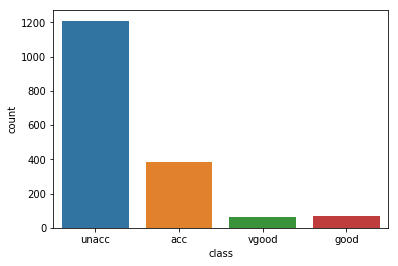

In [112]:
sns.countplot('class', data= data)

#### Identify the target and predictor variables

In [118]:
data['buying'],_ = pd.factorize(data['buying'])
data['maint'],_ = pd.factorize(data['maint'])
data['doors'],_ = pd.factorize(data['doors'])
data['persons'],_ = pd.factorize(data['persons'])
data['lug_boot'],_ = pd.factorize(data['lug_boot'])
data['safety'],_ = pd.factorize(data['safety'])
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,0,0,0,0,0,0,unacc
1,0,0,0,0,0,1,unacc
2,0,0,0,0,0,2,unacc
3,0,0,0,0,1,0,unacc
4,0,0,0,0,1,1,unacc


In [132]:
X = data.iloc[:,:-1]

In [134]:
y = data.iloc[:,-1]

In [135]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
y

array([2, 2, 2, ..., 2, 1, 3])

In [136]:
y_inverse = le.inverse_transform([0,1,2,3])
y_inverse

array(['acc', 'good', 'unacc', 'vgood'], dtype=object)

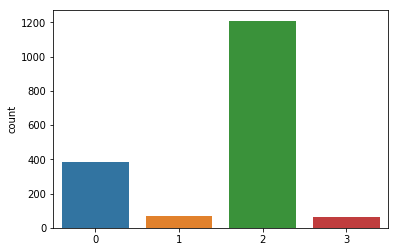

In [137]:
sns.countplot(y)

#### Train Test data split:

In [140]:
# split data randomly into 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [142]:
print(X_train.shape)
print(X_test.shape)
print(y_test.shape)
print(y_test.shape)

(1209, 6)
(519, 6)
(519,)
(519,)


#### Training/model fitting


In [146]:
#train the decision tree
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

#### Test Data and Make Prediction

In [161]:
# use the model to make predictions with the test data
y_pred = dtc.predict(X_test)

#### Model's Parameters Study:

In [153]:
# What is the accuracy score?
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Accuracy: 0.98


In [151]:
# how did our model perform?
count_misclassified = (y_test != y_pred).sum()
count_misclassified

10

In [160]:
# How can we understand confusion matrix?
confusion_matrix(y_test, y_pred)

array([[108,   4,   3,   0],
       [  1,  24,   0,   0],
       [  1,   0, 362,   0],
       [  1,   0,   0,  15]])

In [164]:
# What is the classification report?
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.94      0.96       115
           1       0.86      0.96      0.91        25
           2       0.99      1.00      0.99       363
           3       1.00      0.94      0.97        16

   micro avg       0.98      0.98      0.98       519
   macro avg       0.96      0.96      0.96       519
weighted avg       0.98      0.98      0.98       519

